https://youtu.be/3hjsdfTVWRQ


Author: Dr. Sreenivas Bhattiprolu

Classification of mnist hand sign language alphabets into 25 classes
(Z is not included as it includes a wave motion, not captured using a single image)
Dataset: https://www.kaggle.com/datamunge/sign-language-mnist


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

# Play with the Dataset!

In [ ]:
print(train.shape)
#(27455, 785)
# 27455 samples, each row has 785 columns
# 785 because the first column of each row is the label and the other columns are intensities
# each image is 28 * 28 = 784

(27455, 785)


Label for the image is:  P


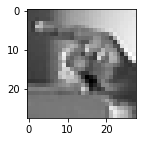

In [ ]:
#Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

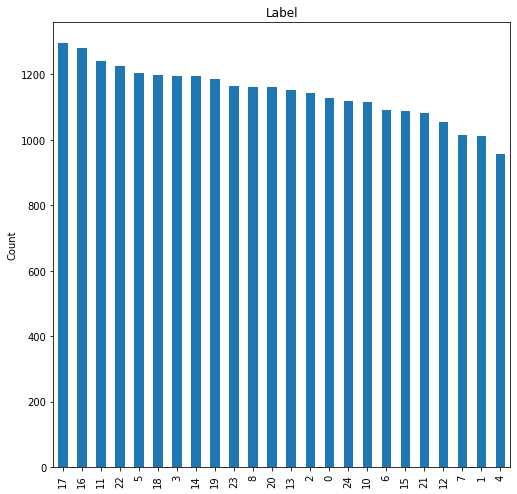

In [ ]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

#Dataset seems to be fairly balanced.

# Preprocess the Data

In [ ]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

# Build the Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

In [ ]:
#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
#history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 29s 129ms/step - loss: 2.4327 - acc: 0.2552 - val_loss: 1.2437 - val_acc: 0.6387
Epoch 2/10
215/215 [==============================] - 27s 127ms/step - loss: 0.9950 - acc: 0.6643 - val_loss: 0.7251 - val_acc: 0.7458
Epoch 3/10
215/215 [==============================] - 28s 128ms/step - loss: 0.5953 - acc: 0.8003 - val_loss: 0.5150 - val_acc: 0.8192
Epoch 4/10
215/215 [==============================] - 27s 127ms/step - loss: 0.4028 - acc: 0.8660 - val_loss: 0.4231 - val_acc: 0.8507
Epoch 5/10
215/215 [==============================] - 27s 127ms/step - loss: 0.2805 - acc: 0.9037 - val_loss: 0.3306 - val_acc: 0.8858
Epoch 6/10
215/215 [==============================] - 27s 127ms/step - loss: 0.2043 - acc: 0.9334 - val_loss: 0.3017 - val_acc: 0.9003
Epoch 7/10
215/215 [==============================] - 37s 170ms/step - loss: 0.1558 - acc: 0.9501 - val_loss: 0.2735 - val_acc: 0.9170
Epoch 8/10
215/215 [==============================] - 3

# Evalute the Model

.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

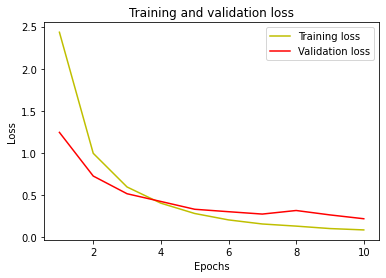

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

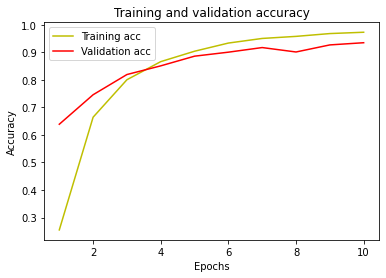

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy Score =  0.9346068042387061
Predicted Label:  Y
True Label:  Y


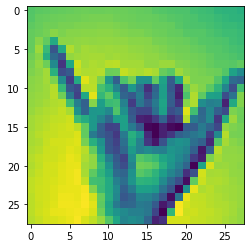

In [ ]:
# prediction = model.predict_classes(X_test)
prediction =model.predict(X_test) 
prediction =np.argmax(prediction,axis=1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])


## Confusion Matrix

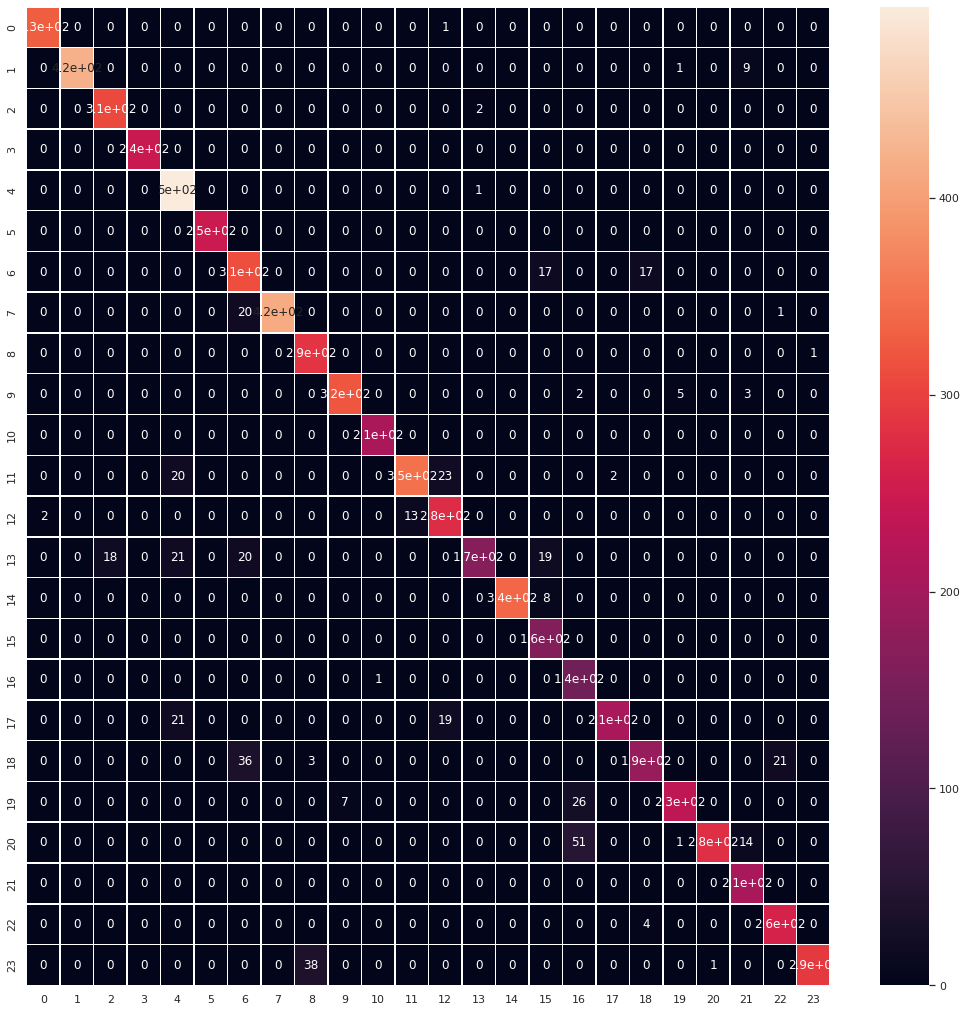

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(18,18))
sns.set(font_scale=1.)
sns.heatmap(cm, annot=True,linewidths=.5, ax=ax)

The lighter the cell, the more correlation between the x and y label.
As the x and y labels are the predicted and original labels, the lighter in the diagonal means the more correlation
between the real label and the predicted label, means the better classification in those samples.
As an example, here the lighetest is the D (the 4'th row and column) which means that the D's are predicted well.

# Plot fractional incorrect misclassifications

([<matplotlib.axis.XTick at 0x7f8e239fb910>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E'),
  Text(0, 0, 'F'),
  Text(0, 0, 'G'),
  Text(0, 0, 'H'),
  Text(0, 0, 'I'),
  Text(0, 0, 'J'),
  Text(0, 0, 'K'),
  Text(0, 0, 'L'),
  Text(0, 0, 'M'),
  Text(0, 0, 'N'),
  Text(0, 0, 'O'),
  Text(0, 0, 'P'),
  Text(0, 0, 'Q'),
  Text(0, 0, 'R'),
  Text(0, 0, 'S'),
  Text(0, 0, 'T'),
  Text(0, 0, 'U'),
  Text(0, 0, 'V'),
  Text(0, 0, 'W'),
  Text(0, 0, 'X')])

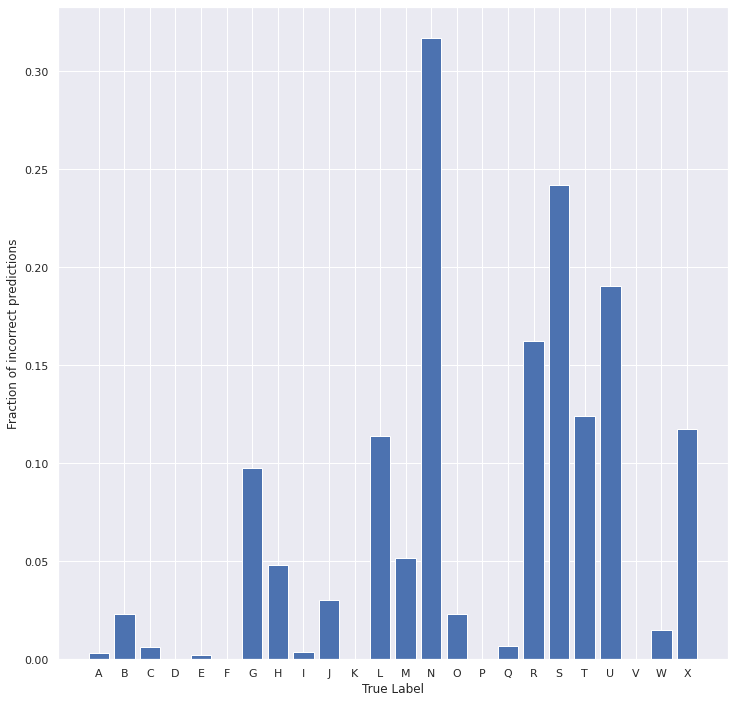

In [34]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 